# Bouncing Ball (not sticking to the surface)

In [1]:
# Load packages
import scipy
import matplotlib.pyplot
import numpy
import math
import malbrid

In [2]:
def get_dynamics_and_zero_crossing_functions(state_name):
    AMain = numpy.array([[0, 1, 0], [0, 0, -9.81], [0, 0, 0]])
    AHaftung = numpy.array([[0,0,0],[0,0,0],[0,0,0]])

    x = simulator.get_var("x")
    xs = simulator.get_var("xspeed")
    cs = simulator.get_var("const")

    def bump(x):
        return "OnlyOne",numpy.array([x[0],-0.9*x[1],x[2]]),False
    
    if state_name=="OnlyOne":
        zero_crossing_down = (x <= 0) & (xs < 0)
        return AMain, [(zero_crossing_down, "bump", bump)]
    else:
        raise Exception("Internal Test error:"+str(state_name))
 

In [3]:
simulator = malbrid.LinearSystemSimulator(["x", "xspeed", "const"])
simulator.simulate(get_dynamics_and_zero_crossing_functions, 
                   "OnlyOne", numpy.array([10.0,0,1.0]),
                   max_timestep=1,max_time=27)


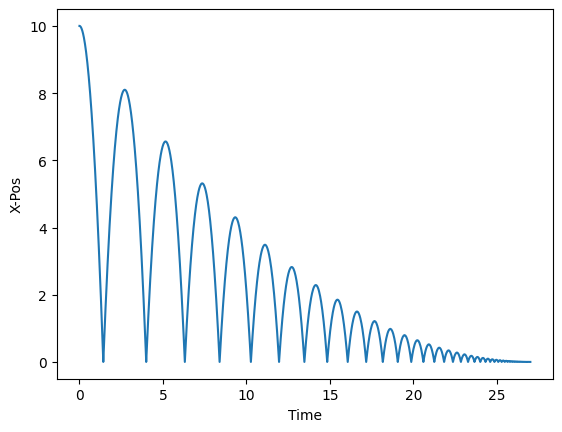

In [4]:
matplotlib.pyplot.plot(numpy.array(simulator.time_points)[:],numpy.array(simulator.continuous_states)[:,0])
matplotlib.pyplot.xlabel('Time')
matplotlib.pyplot.ylabel('X-Pos')
matplotlib.pyplot.show()
